## Principle Component Analysis

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Eigenvectors](#Eigenvectors)  
 * [Exercise EV - Pen and Paper](#Exercise-EV)
* [Principal Component Analysis](#Principal-Component-Analysis)  
 * [Exercise 2D data](#Exercise-2D-data)
* [Example: Food in United Kingdom](#Example-Food-in-United-Kingdom¶)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses) 

## Introduction

This exercise descibes how data can be preprocessed by Principle Component Analysis.
We also give a short review on eigen-equations and how Matrix-Factorization can be used 
to extract important parts of a matrix. 

## Requirements

As requirements you need knowledge in linear algebra.



#### Further readings: text books on linear algebra
- [Linear Algebra and Learning from Data](http://math.mit.edu/~gs/learningfromdata/) [STR19] by Gilbert Strang ist a good textbook which connects the fundamentals of linear algebra with learning from data.
- [Introduction to Linear Algebra](http://math.mit.edu/~gs/linearalgebra/)[STR16] by Gilbert Strang ist a good domain specific textbook
- [Linear Algebra](http://joshua.smcvt.edu/linearalgebra/#current_version) by Jim Hefferson is a open-source textbook with a lot of good exercises
- [Coding the Matrix: Linear Algebra through Applications to Computer Science](http://codingthematrix.com/) by Philip Klein is focused on a computer science viewpoint


#### PCA 

For a more in depth introduction on PCA read: 
- Jonathon Shlens: ["A Tutorial on PCA"](http://arxiv.org/abs/1404.1100), arXiv:1404.1100 (2014)
- Lindsay I Smith: ["A Tutorial on PCA"](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)

### Python Modules

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
#from numpy import * # 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

#### Data and Covariance Matrix

We generate some data points drawn by a multivariate Gaussian:

In [ ]:
np.random.seed(42)

# true mean and true covariance matrix of the underlying Gaussian distribution
cov = np.array([[2.0, 0.8], [0.8, 0.6]])
mean = np.array([2., 1.])

nb_data = 40

# sample the data
X = rd = np.random.multivariate_normal(mean, cov, nb_data)

In [ ]:
# Plot the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X[...,0], X[...,1], c='b', marker='x', label="data")
#ax.set_xlim(-3.,3.)
#ax.set_ylim(-3.,3.)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.draw()
plt.show()

In [ ]:
n = X.shape[0]
assert n==nb_data

mean_empirical = 1/n * X.sum(axis=0)
# or by the numpy build-in
mean_empirical_np = rd.mean(axis=0)
np.testing.assert_almost_equal(mean_empirical, mean_empirical_np)

# here you see that the empirical mean is different from the "true" mean.
print("true mean: ", mean)
print("empirical mean: ", mean_empirical)

The empirical covariance between two random variables is defined as:
$$
\text{cov-var}(x_1, x_2) = \frac{1}{n-1} \sum_j^n (x_1^{(j)}- \bar x_1) (x_2^{(j)}- \bar x_2) 
$$

So, we compute the empirical covariance matrix by first centering the data, i.e. substract the mean.
With the design (data) matrix $X$: 

$$\hat X = X - \bar X$$

- with the means of each variable dimensions $\bar X$.

We can compute all variances and covariances with a dot-product in a covariance matrix $C$:

$$
C = \frac{1}{n-1} \hat X^T \cdot \hat X = 
\frac{1}{n-1}
\begin{pmatrix}
\hat x_1^{(1)}& \hat x_1^{(2)} & \hat x_1^{(3)} & \dots \\
\hat x_2^{(1)}& \hat x_2^{(2)} & \hat x_2^{(3)}  & \dots\\
\end{pmatrix}
\cdot 
\begin{pmatrix}
\hat x_1^{(1)}& \hat x_2^{(1)}     \\
\hat x_1^{(2)}& \hat x_2^{(2)}   \\
\hat x_1^{(3)}& \hat x_2^{(3)}     \\
\dots & \dots  \\
\end{pmatrix} = 
\frac{1}{n-1} 
\begin{pmatrix}
\sum_j \hat x_1^{(j)} \hat x_1^{(j)} &  \sum_j \hat x_1^{(j)} \hat x_2^{(j)}   \\
\sum_j \hat x_2^{(j)} \hat x_1^{(j)} &  \sum_j \hat x_2^{(j)} \hat x_2^{(j)}   \\
\end{pmatrix}
$$


In [ ]:
X_centered  = X - mean_empirical
cov_mat = C = 1./(n-1)* X_centered.T.dot(X_centered)

# can also be computed by a numpy build-in
cov_mat_np = np.cov(X, rowvar=0)
np.testing.assert_array_almost_equal(cov_mat, cov_mat_np)

cov_mat

### Eigenvectors


Eigen-equation:

$$
C \vec q = \lambda \vec q
$$

with a square Matrix $C$ and a scalar $\lambda$.

We are searching for the vectors $\vec q$ that solve the eigen-equation and the corresponding scalars $\lambda$.
Such vectors are called eigenvectors and the scalars eigenvalues.


The eigenvectors $\vec q$ are the vectors that don't change their direction if they are transformed by $C$.

#### Intuition for (largest) Eigenvalue and Eigenvector

Here we show what happens if we repeatly transform a vector $y$ by a matrix $C$
and rescaling the vector to length $1$, i.e. we have a loop over 

$$
\text{rescale}(C \vec y)
$$


In [ ]:
# as python function:
def rescale_Cy(y, rescale=True):
    y = C.dot(y)
    if rescale:
        y = y / np.linalg.norm(y)
    return y

In [ ]:
%matplotlib inline
# for visualization
def plot_vector(y, ax=None, color="black", lim=1.1):
    if ax is None:
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_xlim(-1.1,lim)
        ax.set_ylim(-1.1,lim)
    ax.arrow(0,0, y[0], y[1], alpha=0.5, shape="full", head_width=0.05, color=color)
    return ax

In [ ]:
# Cy  applied once
y = np.array([1.,-1.])
# y should have length 1
y = y/np.linalg.norm(y)
y 

ax = plot_vector(y, color="red")

y = rescale_Cy(y)
plot_vector(y, ax=ax, color="black")
# The vector is roteted by rescale(Cx) . Rescaling preserves the length.

In [ ]:
# Cy  applied once
y = np.array([1.,-1.])
# y should have length 1
y = y/np.linalg.norm(y)
ax = plot_vector(y, color="red")

# loop over Cy
for i in range(10):
    y = rescale_Cy(y)
    plot_vector(y, ax=ax, color="black")

The vector rotates towards the direction to the eigenvector with the largest eigenvalue.
If the direction of the eigenvector is reached, the transformation does not change the direction any more.

In [ ]:
# Note: without rescaling the vector length changes

y = np.array([1.,-1.])
y = y/np.linalg.norm(y)
ax = plot_vector(y, color="red", lim=6.)

# loop over Cx
for i in range(5):
    y = rescale_Cy(y, rescale=False)
    plot_vector(y, ax=ax, color="black")

#### PCA by Eigendecomposiontion

The eigenequation $$C\vec q = \lambda \vec q$$

is equivalent to
$$
(C - \lambda \mathbb 1)  \vec q =  \vec 0
$$

This (homogenous) equation has a solution $\vec q\neq \vec 0$ if the determinant vanishes, i.e.:

$$
\det(C - \lambda \mathbb 1) = 0
$$


#### Exercise EV 
(Pen and Paper)

Compute the eigenvalues and eigenvectors for our (true) covariance matrix:

$$
C= \begin{pmatrix}
2  & 0.8 \\
0.8 & 0.6 
\end{pmatrix}
$$

Note that covariance matrices are positive semidefinite, thus have all positive eigenvalues.

### Principal Component Analysis

Now we have data in a 3D-Space:

In [ ]:
np.random.seed(42)
# class 0:
# covariance matrix and mean
cov0 = np.array([[5.,  -2., 1.], 
                 [-2., 3., 1.], 
                 [1.,  1., 9.]])
                 
mean0 = np.array([2.,-1.,3])

#number of data points
m = 1000

# generate m0 gaussian distributed data points with
# mean0 and cov0.
rd = X = np.random.multivariate_normal(mean0, cov0, m)

mean = rd.mean(axis=0)
cov_mat = np.cov(rd, rowvar=0)
cov_mat # empirical cov-matrix

In [ ]:
# note: if performance is an issue use the scipy implementation instead
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
eigenvalues, eigenvectors

#### Exercise: 

Check with `np.testing.assert_almost_equal` that the eigen-equation is valid: $$ C \vec q = \lambda  \vec q $$

#### Exercise: 

Check with numpy that the eigen-vectors $\vec q_i$ are orthogonal.

In [ ]:
# for plotting an arrow in 3D space
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


#### Reconstruction from rank 1 pieces


Note that a matrix-matrix multiplication 
$
AB=C
$
can be written as a sum of rank-1 matricies:

$$
AB = \vec a_1 \vec b^*_1 + \vec a_2 \vec b^*_2 +\vec a_3 \vec b^*_3 + \dots
$$

Each piece (component) is an outer product of the column vectors $\vec a_i$ of $A$ and row vectors $\vec b^*_i$ of $B$. For details see [STR19].

In data science / machine learning we often have a matrix $C$ and want to write it as a sum of important terms. 
Herefore, we must factorize the matrix as a dot-product of matricies. Such a factorization uncovers the importants parts of the matrix.

In PCA the symmetric $n \times n$ covariance matrix $C$ is factorized as $C = Q \Lambda Q^T$
with 
- $Q$ is a matrix with eigenvectors of $C$ as column vectors. $Q^T$ is orthogonal, i.e. $\vec q_i \vec q_j = \delta_{ij}$. $\delta_{ij}$ is the Kronecker delta, i.e. if $i=j$ then $\delta_{ij}=1$ else $\delta_{ij}=0$. Note that for a orthogonal matrix $Q$ follows $Q^T=Q^{-1}$. 
- The diagonal matrix $\Lambda$ contains the real eigenvalues of $C$.

#### Exercise

Show from the eigenequation(s) that $C = Q \Lambda Q^T$. 



Therefore, with a symmetric matrix a factorization can be yielded by eigen-decomposition as a sum of rank-1 pieces:

$$
C = Q \Lambda Q^T = \lambda_1 \vec q_1 \vec q_1^T + \lambda_2 \vec q_2 \vec q_2^T + \dots + \lambda_n \vec q_n \vec q_n^T
$$

The outer product $\vec q_1 \vec q_1^T$ is equivalent to a symmetric rank-1 matrix. 

Symmetric, because of: $(\vec q_1 \vec q_1^T) ^T = \vec q_1 \vec q_1^T$

#### Exercise

$$
C =  \lambda_1 \vec q_1 \vec q_1^T + \lambda_2 \vec q_2 \vec q_2^T  \lambda_3 \vec q_3 \vec q_3^T
$$

Verify numerically (with numpy) that 

$$
C =  \lambda_1 \vec q_1 \vec q_1^T + \lambda_2 \vec q_2 \vec q_2^T  + \lambda_3 \vec q_3 \vec q_3^T
$$

holds for our covariance matrix.

Later we show what the meaning is of the three components (pieces).
But, first let's visualize the data together with the scaled eigenvectors (scaled by the square root of the corresponing eigenvalue).

#### Visualization of the eigenvectors together with the data

In [ ]:
eigenvectors

In [ ]:
# first we sort the eigenvectors and eigenvalues 
idx = eigenvalues.argsort()[::-1]

# resort by indexing
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [ ]:
plt.close('all') # close all latent plotting windows

%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook

# If the plot don't work, run this cell again!!!

In [ ]:
def plot_data_and_sev(X, sev):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[...,0], X[...,1], X[...,2], c='b', marker='x', label="raw data")

    for s in sev.T:
        a = Arrow3D([mean[0], s[0]+mean[0]], [mean[1], s[1]+mean[1]], [mean[2], s[2]+mean[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")     
        ax.add_artist(a)
    
    ax.set_xlabel("x'")
    ax.set_ylabel("y'")
    ax.set_zlabel("z'")
    ax.set_xlim(-9.,9.)
    ax.set_ylim(-9.,9.)
    ax.set_zlim(-9.,9.)
    plt.title('Data and Eigenvectors')
    plt.draw()
    plt.show()

In [ ]:
#scaled eigenvectors for visualization
sev = eigenvectors * np.sqrt(eigenvalues) # broadcasting 
data = rd
plot_data_and_sev(data, sev)

#### Visualization in Eigenspace

In [ ]:
# the eigenvectors computed by numpy are normed to length 1
for ev in eigenvectors:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    

# sort the eigenvectors and eigenvalues 
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
        
# Now we change the orthonormal basis of the coordinate system
# Note that the scalar product of two vectors can be interpreted as a projection
# of one of the vectors on the other.
rd_new_basis = (rd-mean).dot(eigenvectors)

# Plot the data in the new space:
plt.close('all') # close all latent plotting windows
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rd_new_basis[...,0], rd_new_basis[...,1], rd_new_basis[...,2], c='b', marker='x', label="projected data")
for s in (5. * np.eye(3)):
    #print (s, " ")
    a = Arrow3D([0., s[0]], [0., s[1]], [0., s[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
    

ax.set_xlim(-9.,9.)
ax.set_ylim(-9.,9.)
ax.set_zlim(-9.,9.)
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_zlabel("z'")

plt.title('Data in Eigenspace.')
plt.draw()
plt.show()


Note, that the data is spread largest in the direction of the eigenvector that corresponds to the largest eigenvalue.

In the following we assume, that the eigenvalues and eigenvectors are ordered: $\lambda_1 \geq \lambda_2 \geq \dots$

#### Plot of the decomposition

Let's plot the data that corresponds to the strongest component $\lambda_1 \vec q_1 \vec q_1^T$ of $C$.

In [ ]:
m = len(rd)
# project the data on the first eigenvector
rd_new_basis = (rd-mean).dot(eigenvectors[...,0])
# projected data in original data space 
c = (eigenvectors[:,0] * rd_new_basis.reshape(m, -1))
reduced_data = c + mean

In [ ]:
# visualization
sev = (eigenvectors[:,0] * np.sqrt(eigenvalues[0])).reshape(3,-1) # broadcasting 
plot_data_and_sev(reduced_data, sev)

Now, we use the first two components of $C$ for an approximation of $C$:

$$
\tilde C = \lambda_1 \vec q_1 \vec q_1^T +  \lambda_2 \vec q_2 \vec q_2^T
$$

The data projected on the space of the first two eigenvectors lies in the plane spanned by the first two eigenvectors.

Let's plot such the reduced data.

In [ ]:
# cov matrix without the weakest component for test
j=1
cov_matrix_red = np.zeros_like(cov_mat)
for i in range(0, len(eigenvectors)-j): # without loop
    cov_matrix_red += eigenvalues[i] * np.outer(eigenvectors.T[i],eigenvectors.T[i])
cov_matrix_red

In [ ]:
i=2 # how many components we want. 
rd_new_basis = (rd-mean).dot(eigenvectors[...,:i])

# we want 
#c0 = eigenvectors[:,0] * rd_new_basis[:,0].reshape(1000,-1)
#c1 = eigenvectors[:,1] * rd_new_basis[:,1].reshape(1000,-1)
#c2 = eigenvectors[:,2] * rd_new_basis[:,2].reshape(1000,-1)
#c = c0+c1+c2 # vector addition
# in a one-liner:
c = (eigenvectors.T[:i] * rd_new_basis.reshape(1000,i,-1)).sum(axis=1)

# reduced 
#reduced_data = c + mean
#np.testing.assert_almost_equal(np.cov(reduced_data, rowvar=0), cov_matrix_red)


In [ ]:
# visualization
sev = (eigenvectors[:,:-1] * np.sqrt(eigenvalues[:-1])) # broadcasting 
plot_data_and_sev(reduced_data, sev)

#### Reduced Data and Whitening

In data processing PCA is often used for dimensionality reduction.

The data is projected in the eigenspace and only the first x-components (ordered by the amount of the eigenvalues)
are used for subsequent data analysis steps.

E.g. for our case the data can be projected to the eigenvector-space of the eigenvectors corresponding to the 
first two largest eigenvalues:

In [ ]:
###
# So we can skip the last dim 
rd_new_basis = (rd-mean).dot(eigenvectors[...,:-1])


print (rd_new_basis.shape)

In [ ]:
plt.close('all') # close all latent plotting windows
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(rd_new_basis[...,0], rd_new_basis[...,1], c='b', marker='x', label="projected data")
ax.set_xlim(-11.,11.)
ax.set_ylim(-11.,11.)
ax.set_xlabel('new_x_values')
ax.set_ylabel('new_y_values')
plt.draw()
plt.show()

#### Whitening

Sometimes as an addtional step each component is divided by the square-root of the corresonding eigenvalues.

In [ ]:
# Whitening
# scale by the inverse of the sqrt of the eigenvalues
rd_new_basis = rd_new_basis / np.sqrt(eigenvalues[:2])


In [ ]:
plt.close('all') # close all latent plotting windows
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(rd_new_basis[...,0], rd_new_basis[...,1], c='b', marker='x', label="projected data")
ax.set_xlim(-4.,4.)
ax.set_ylim(-4.,4.)
ax.set_xlabel('new_x_values')
ax.set_ylabel('new_y_values')
plt.draw()
plt.show()


#### Exercise 2D data

Apply PCA on our 2-D data set of the beginning of the notebook.

1. Visualize the data and the scaled eigenvectors in a 2D-Plot.
1. Project the data on the eigenvector corresponding to the largest eigenvalue. 
1. Visualize the data and the projected data.

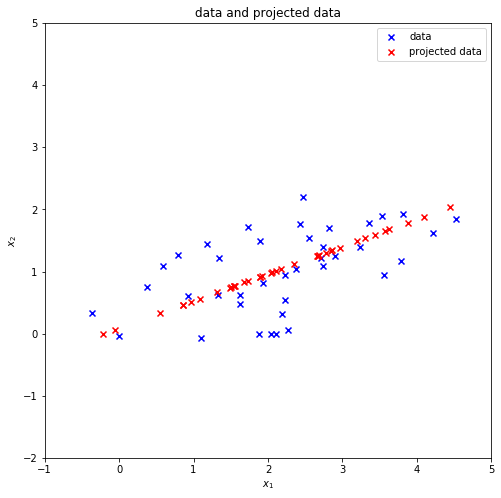

In [ ]:
# Let's restore the 2D-data set

np.random.seed(42)

# true mean and true covariance matrix of the underlying Gaussian distribution
cov = np.array([[2.0, 0.8], [0.8, 0.6]])
mean = np.array([2., 1.])

nb_data = 40

# sample the data
X = rd = np.random.multivariate_normal(mean, cov, nb_data)


In [ ]:
%matplotlib inline

### Example Food in United Kingdom

see also, http://setosa.io/ev/principal-component-analysis/

However, we normalize the data before PCA. Discuss why this make sense.
See also: https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca

In [ ]:
import pandas as pd

names = ['England','Wales','Scotland', 'North Ireland']

food = pd.read_csv("food.dat", sep=" ", index_col=0, header=None, 
            names=names).transpose()

In [ ]:
food

In [ ]:
normalized_food=(food-food.mean())/food.std() # in pandas this is done per column

In [ ]:
cov_mat_food = normalized_food.cov()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat_food)
eigenvectors[0] # numerically instable produces complex eigenvalues and eigenvectors!

In [ ]:
food_ = food - food.mean() # for pca via svd the data must have zero-mean
food_ = normalized_food

In [ ]:
eigenvalues[:4]

Therefore, we use SVD for numerically stable PCA, see e.g.
https://stats.stackexchange.com/questions/245712/intuition-as-to-why-estimates-of-a-covariance-matrix-are-numerically-unstable

#### PCA

Eigen-equation:
$$
 \frac{1}{n-1}X'X'^T Q = Q \Lambda
$$

with
- $X'$: centered data matrix $\rightarrow$ covariance matrix: $C = \frac{1}{n-1}X'X'^T$
- $Q$: Matrix with the eigenvectors as columns (Note that the matrix is orthonormal: $QQ^T=\mathbb 1$)
- $\Lambda$: diagonal matrix with the eigenvalues in the diagonal

$$
 \frac{1}{n-1}X'X'^T  = Q \Lambda Q^T
$$

#### SVD of $X'$

from $U S V^T = X$:
$$
X' X'^T = U S V^T (U S V^T)^T
$$

$$
X' X'^T = U S V^T V S^T U^T = U S S^T U^T
$$

$\Rightarrow$ 
- $U = Q$
- $SS^T = (n-1) \Lambda$

In [ ]:
U,S,Vh = np.linalg.svd(food_, full_matrices=False)
principalComponents = np.dot(food_, Vh.T)[:,0:2]
principalComponents

In [ ]:
eigenvalues = S**2/(food_.shape[0]-1)
eigenvalues 

In [ ]:
# by sklearn 
from sklearn.decomposition import PCA
pca = PCA(2, whiten=False)
principalComponents = pca.fit_transform(food_)
principalComponents

Note: SVD suffers from a problem called “sign indeterminacy”, which means the sign of the components_ and the output from transform depend on the algorithm and random state.
from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [ ]:
colors="brgy"
fig = plt.figure(figsize=(6,2))#, facecolor='white')
ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)

for i, (name, c) in enumerate(zip(names, colors)):
    ax1.scatter(principalComponents[i,0], 0, c=c, marker="+", label=name)
ax1.set_xlabel("first principal component")

ax1.set_xlim((principalComponents).min()*1.1, principalComponents.max()*1.1)
ax1.set_ylim(-.01, .1)
plt.legend();

Compare the first principal components of the normalized vs. the unnormalized data.

In [ ]:
plt.figure(figsize=(6,6))
colors="brgy"
for i, (name, c) in enumerate(zip(names, colors)):
    plt.scatter(principalComponents[i,0], principalComponents[i,1], c=c, marker="+", label=name)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.xlim((principalComponents).min()*1.1, principalComponents.max()*1.1)
plt.ylim((principalComponents).min()*1.1, principalComponents.max()*1.1)
plt.legend();

## Literature

<table>
    <tr>
        <td>
            <a name="STR19"></a>[STR19]
        </td>
        <td>
            Gilbert Strang, "Linear Algebra and Learning from Data", Wellesley-Cambridge Press, 2019
        </td>
    </tr>
</table>

## Summary and Outlook

This exercise covered PCA. PCA is an important technique for data preprocessing. We also introducted the numerically stable version of PCA via SVD. 

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Matrix and Vector Operations <br/>
by Christian Herta <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2019 Christian Herta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.